In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ATTACK_TARGET = "36"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [3]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [4]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

# files = listdir("../data")
files = listdir("../samples/util100/c_data")

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"../samples/util100/c_data/C{ATTACK_TARGET}_{i}.csv")
    # c_data = pd.read_csv(f"../data/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,25,15,582,2,4,0,4,0,1,2,0,3,1,2,0,1
1,F,18,7,327,4,4,5,4,5,2,3,2,5,1,4,0,5
2,M,50,4,354,3,0,0,1,2,4,5,3,2,4,1,2,4
3,M,56,1,950,3,0,0,4,3,3,5,0,2,0,4,3,4
4,M,25,10,284,3,1,1,0,0,5,4,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,45,6,559,4,5,0,5,5,0,3,3,2,1,0,4,1
9996,M,50,20,967,5,5,0,1,0,5,5,1,2,0,0,4,3
9997,M,50,4,273,2,2,0,5,4,0,1,1,2,0,0,1,5
9998,F,50,8,925,4,2,0,1,1,4,4,1,0,5,0,5,3


### Ba, Bbの読み込み

In [5]:
Ba = pd.read_csv(f"../samples/util100/B{ATTACK_TARGET}a.csv")
# Ba = pd.read_csv(f"../data/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Blisse Salle,F,35,3,486
1,Anson Truitt,M,45,13,372
2,Karen Parzis,F,25,6,525
3,Culver Vayro,M,45,4,907
4,Goddart Gowanson,M,18,16,912


In [6]:
Bb = pd.read_csv(f"../samples/util100/B{ATTACK_TARGET}b.csv")
# Bb = pd.read_csv(f"../data/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,5,1,2,0,5,1,0,1,2,4,...,2,2,1,3,0,3,5,2,5,4
1,0,3,0,2,3,3,4,1,1,3,...,1,2,2,0,4,0,2,0,5,2
2,4,4,4,2,4,5,3,3,0,3,...,1,0,2,2,2,0,5,0,0,4
3,1,0,2,1,0,0,0,1,0,0,...,3,0,0,0,0,0,4,0,0,3
4,3,0,3,5,2,5,1,2,3,4,...,0,0,0,1,5,1,0,0,0,2


### 攻撃に利用するGAOZと映画のIDの全ペア

In [7]:
cross_tab_pairs = []

for gaoz_header in B_USER_ATTRIBUTE_HEADERS:
    for movie_id in MOVIE_IDS:
        cross_tab_pairs.append((gaoz_header, movie_id))

cross_tab_pairs[:]

[('Gender', '2'),
 ('Gender', '56'),
 ('Gender', '247'),
 ('Gender', '260'),
 ('Gender', '653'),
 ('Gender', '673'),
 ('Gender', '810'),
 ('Gender', '885'),
 ('Gender', '1009'),
 ('Gender', '1073'),
 ('Gender', '1097'),
 ('Gender', '1126'),
 ('Gender', '1525'),
 ('Gender', '1654'),
 ('Gender', '1702'),
 ('Gender', '1750'),
 ('Gender', '1881'),
 ('Gender', '1920'),
 ('Gender', '1967'),
 ('Gender', '2017'),
 ('Gender', '2021'),
 ('Gender', '2043'),
 ('Gender', '2086'),
 ('Gender', '2087'),
 ('Gender', '2093'),
 ('Gender', '2100'),
 ('Gender', '2105'),
 ('Gender', '2138'),
 ('Gender', '2143'),
 ('Gender', '2174'),
 ('Gender', '2193'),
 ('Gender', '2253'),
 ('Gender', '2399'),
 ('Gender', '2628'),
 ('Gender', '2797'),
 ('Gender', '2872'),
 ('Gender', '2968'),
 ('Gender', '3393'),
 ('Gender', '3438'),
 ('Gender', '3439'),
 ('Gender', '3440'),
 ('Gender', '3466'),
 ('Gender', '3479'),
 ('Gender', '3489'),
 ('Gender', '3877'),
 ('Gender', '3889'),
 ('Age', '2'),
 ('Age', '56'),
 ('Age', '247'

### C0~C9の各cross集計の平均をとる

In [8]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for gaoz_header, movie_id in cross_tab_pairs:
    # cross_tab = pd.crosstab(combined_data[gaoz_header], combined_data[movie_id], normalize='all')
    # cross_tabs[(gaoz_header, movie_id)] = cross_tab
    cross_tab = pd.crosstab(combined_data[gaoz_header], combined_data[movie_id], normalize='all')
    # movie_id（列）の範囲を0~5に固定
    all_movie_ratings = range(6)
    cross_tab = cross_tab.reindex(columns=all_movie_ratings, fill_value=0)
    # 列をソート（0~5の順）
    cross_tab = cross_tab.sort_index(axis=1)
    cross_tabs[(gaoz_header, movie_id)] = cross_tab

cross_tabs[cross_tab_pairs[3]]

260,0,1,2,3,4,5
Gender,,,,,,
F,0.0543,0.0510,0.0542,0.0524,0.0575,0.0555
M,0.1092,0.1114,0.1134,0.1104,0.1200,0.1107


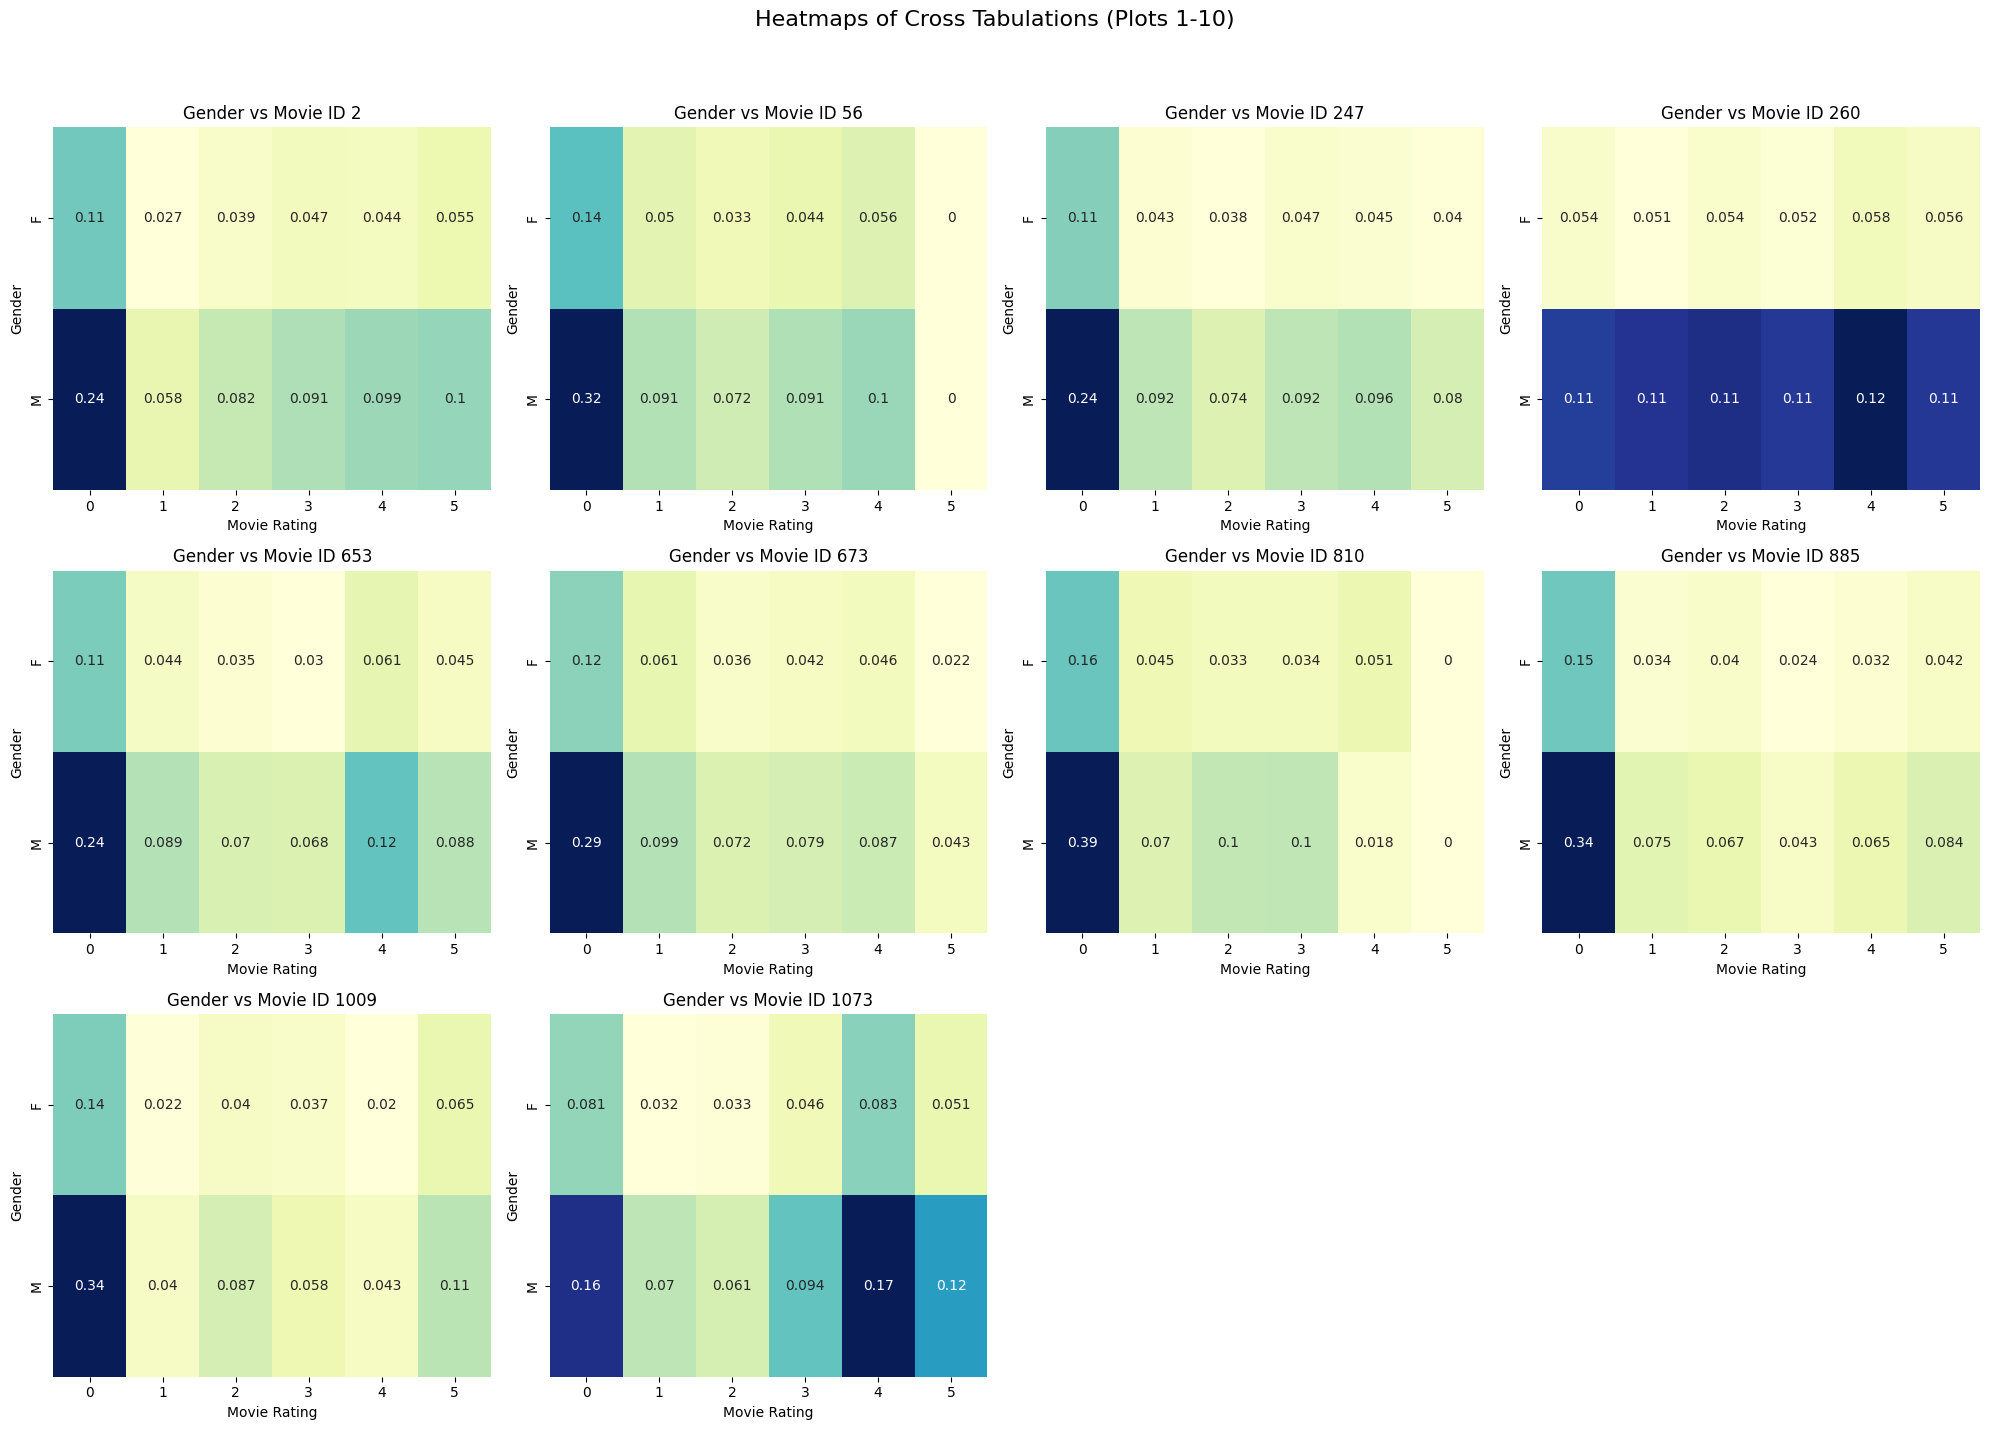

Total number of cross tabulations: 184


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12, start_index=0):
    end_index = start_index + num_plots
    cross_tabs_subset = list(cross_tabs.items())[start_index:end_index]
    num_plots = len(cross_tabs_subset)  # 実際のプロット数を更新

    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle(f"Heatmaps of Cross Tabulations (Plots {start_index+1}-{end_index})", fontsize=16)

    for i, ((gaoz_header, movie_id), cross_tab) in enumerate(cross_tabs_subset):
        row = i // 4
        col = i % 4
        ax = axes[row, col] if num_rows > 1 else axes[col]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{gaoz_header} vs Movie ID {movie_id}")
        ax.set_ylabel(gaoz_header)
        ax.set_xlabel("Movie Rating")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        row = i // 4
        col = i % 4
        if num_rows > 1:
            fig.delaxes(axes[row, col])
        else:
            fig.delaxes(axes[col])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=10)

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Baのデータの分布を確認する

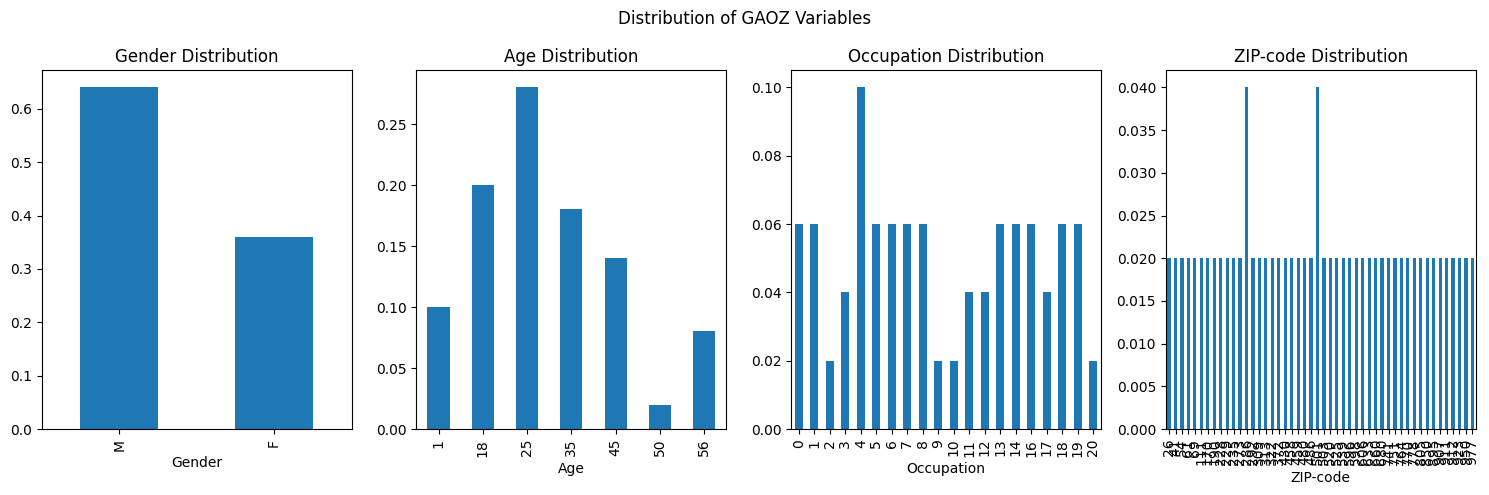

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Distribution of GAOZ Variables')

# Gender分布
Ba['Gender'].value_counts(normalize=True).plot(kind='bar', ax=axs[0], title='Gender Distribution')

# Age分布
Ba['Age'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[1], title='Age Distribution')

# Occupation分布
Ba['Occupation'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[2], title='Occupation Distribution')

# ZIP-code分布
Ba['ZIP-code'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=axs[3], title='ZIP-code Distribution')

plt.tight_layout()
plt.show()

### GAOZの各要素をBaの分布になるように、正規化する

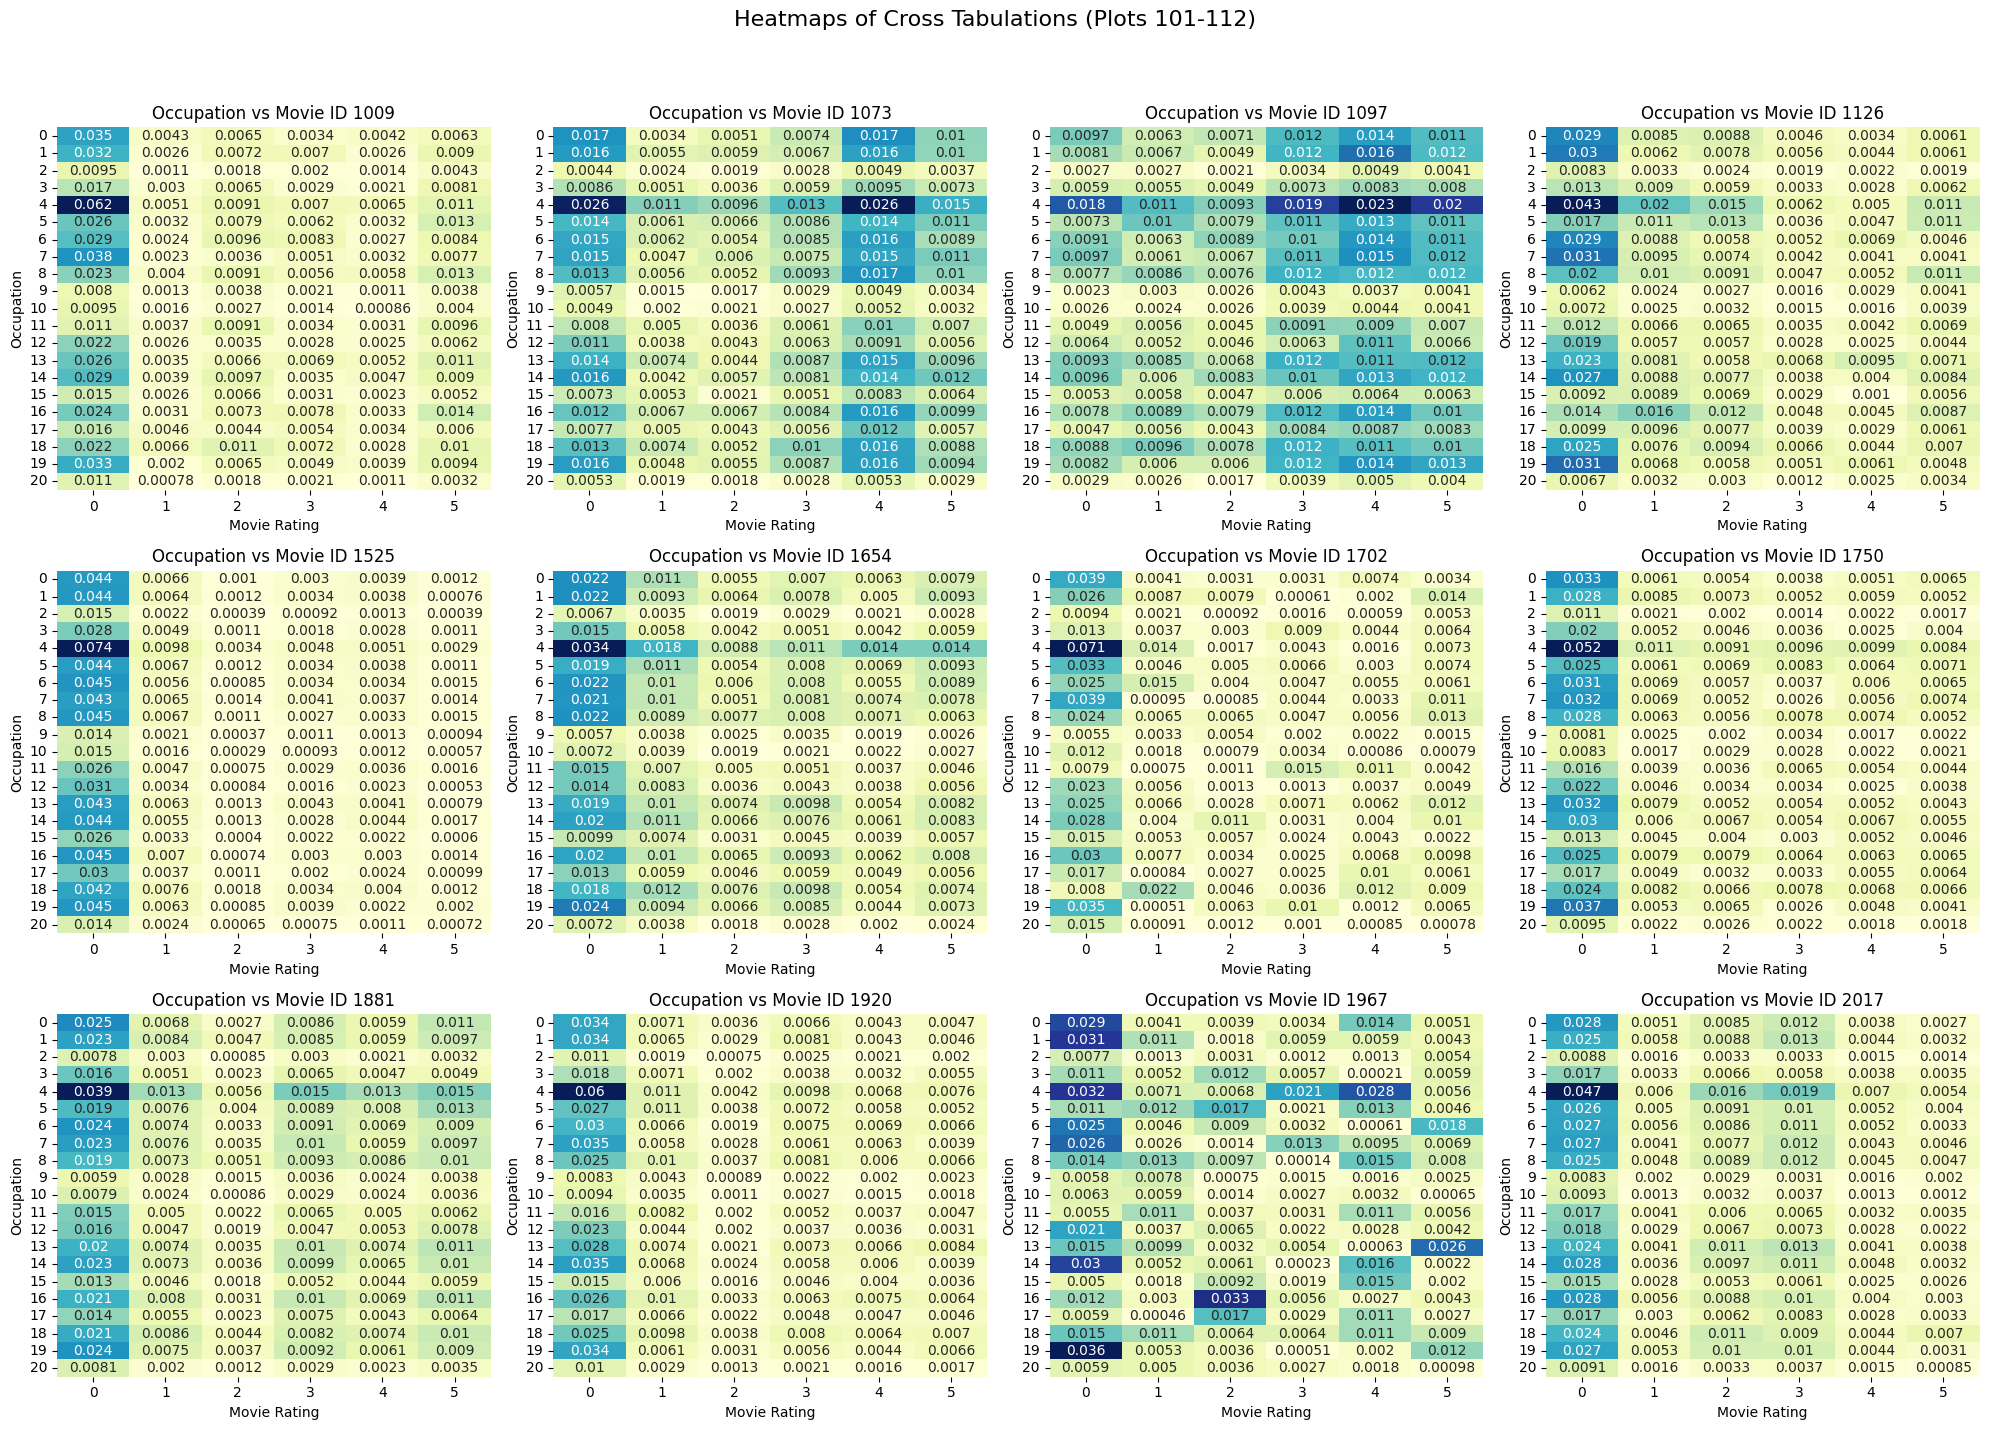

In [11]:
# Baデータセットのカテゴリ変数の分布を計算
ba_distributions = {
    'Gender': Ba['Gender'].value_counts(normalize=True),
    'Age': Ba['Age'].value_counts(normalize=True),
    'Occupation': Ba['Occupation'].value_counts(normalize=True),
    'ZIP-code': Ba['ZIP-code'].value_counts(normalize=True)
}

# 正規化関数
def normalize_cross_tab(cross_tab, ba_distribution):
    # クロス集計の各行（年齢カテゴリ）の合計を計算
    row_sums = cross_tab.sum(axis=1)
    # 正規化係数を計算（Baの分布 / クロス集計の分布）
    normalization_factors = ba_distribution / row_sums
    # 無限大や NaN を含む行を 1 に設定（元の値を保持）
    normalization_factors = normalization_factors.replace([np.inf, -np.inf, np.nan], 1)
    # クロス集計の各行に正規化係数を適用
    normalized_cross_tab = cross_tab.mul(normalization_factors, axis=0)
    return normalized_cross_tab

# 全てのクロス集計に対して正規化を適用
normalized_cross_tabs = {}
for (gaoz_header, movie_id), cross_tab in cross_tabs.items():
    if gaoz_header in ba_distributions:
        normalized_cross_tab = normalize_cross_tab(cross_tab, ba_distributions[gaoz_header])
        normalized_cross_tabs[(gaoz_header, movie_id)] = normalized_cross_tab
    else:
        normalized_cross_tabs[(gaoz_header, movie_id)] = cross_tab


plot_heatmaps(normalized_cross_tabs, num_plots=12, start_index=100)

### BaとBbを組み合わせて、`normalized_cross_tabs` に最も近づく割り当て問題を解く

**以下のコードは途中なので参考にならない**

In [12]:
categorized_Bb = Bb.copy()
for col in MOVIE_IDS:
    categorized_Bb[col] = categorized_Bb[col].replace('*', "0").astype(int)
    categorized_Bb[col] = pd.Categorical(categorized_Bb[col], categories=[0, 1, 2, 3, 4, 5])

# permute_array = np.array(range(50))
# permute_array[0] = 1
# permute_array[1] = 1
# permute_array[2] = 1
# permute_array[3] = 1
# permute_array[4] = 1
# permute_array[5] = 1

# 回答のPermutation
# TODO: この回答の際にロスがミニマムになるように調整してあげる必要あり
permute_array = [3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]

Ba_shuffled = Ba.iloc[permute_array].reset_index(drop=True)
Bs = pd.concat([Ba_shuffled, categorized_Bb], axis=1)
Bs.head()

,Name,Gender,Age,Occupation,ZIP-code,2,56,247,260,653,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,Culver Vayro,M,45,4,907,5,1,2,0,5,...,2,2,1,3,0,3,5,2,5,4
1,Hasheem Syer,M,56,18,54,0,3,0,2,3,...,1,2,2,0,4,0,2,0,5,2
2,Dosi Freschi,F,56,1,895,4,4,4,2,4,...,1,0,2,2,2,0,5,0,0,4
3,Javier Bascombe,M,18,1,111,1,0,2,1,0,...,3,0,0,0,0,0,4,0,0,3
4,Alanah Cocking,F,56,18,503,3,0,3,5,2,...,0,0,0,1,5,1,0,0,0,2


In [13]:
def get_cross_tabs(bs):
    cross_tabs = {}
    for gaoz_header, movie_id in cross_tab_pairs:
        cross_tab = pd.crosstab(bs[gaoz_header], bs[movie_id], normalize='all')
        # movie_id（列）の範囲を0~5に固定
        all_movie_ratings = range(6)
        cross_tab = cross_tab.reindex(columns=all_movie_ratings, fill_value=0)
        # 列をソート（0~5の順）
        cross_tab = cross_tab.sort_index(axis=1)
        cross_tabs[(gaoz_header, movie_id)] = cross_tab
    return cross_tabs

temp_cross_tabs = get_cross_tabs(Bs)
# plot_heatmaps(temp_cross_tabs, num_plots=12, start_index=0)


In [14]:
loss_sum = 0

bs_cross_tab = get_cross_tabs(Bs)

for cross_tab_pair in cross_tab_pairs:
    diff = np.abs(bs_cross_tab[cross_tab_pair] - normalized_cross_tabs[cross_tab_pair])
    total_diff = diff.sum().sum()
    loss_sum += total_diff

print(f"Total loss: {loss_sum}")

Total loss: 151.32208527543025


In [53]:
import numpy as np
import pandas as pd

def normalize_cross_tab(cross_tab, ba_distribution, sample_size=50, population_size=1000):
    # クロス集計の各行（カテゴリ）の合計を計算
    row_sums = cross_tab.sum(axis=1)
    
    # サンプリング補正係数を計算
    correction_factor = (population_size - sample_size) / (population_size - 1)
    
    # 正規化係数を計算（Baの分布 / クロス集計の分布）、サンプリング補正を適用
    normalization_factors = (ba_distribution / row_sums) * correction_factor
    
    # 無限大や NaN を含む行を 1 に設定（元の値を保持）
    normalization_factors = normalization_factors.replace([np.inf, -np.inf, np.nan], 1)
    
    # クロス集計の各行に正規化係数を適用
    normalized_cross_tab = cross_tab.mul(normalization_factors, axis=0)
    
    return normalized_cross_tab

# 全てのクロス集計に対して正規化を適用
normalized_cross_tabs = {}
for (gaoz_header, movie_id), cross_tab in cross_tabs.items():
    if gaoz_header in ba_distributions:
        normalized_cross_tab = normalize_cross_tab(cross_tab, ba_distributions[gaoz_header])
        normalized_cross_tabs[(gaoz_header, movie_id)] = normalized_cross_tab
    else:
        normalized_cross_tabs[(gaoz_header, movie_id)] = cross_tab

def calculate_improved_loss(permute_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs):
    Ba_shuffled = Ba.iloc[permute_array].reset_index(drop=True)
    Bs = pd.concat([Ba_shuffled, categorized_Bb], axis=1)
    bs_cross_tab = get_cross_tabs(Bs)
    
    loss_sum = 0
    loss_details = {}
    
    for cross_tab_pair in cross_tab_pairs:
        observed = bs_cross_tab[cross_tab_pair]
        expected = normalized_cross_tabs[cross_tab_pair]
        
        # エプシロンを加えて0除算を防ぐ
        epsilon = 1e-10
        
        # Jensen-Shannon divergenceを使用したロス計算
        m = 0.5 * (observed + expected)
        js_divergence = 0.5 * np.sum(observed * np.log((observed + epsilon) / (m + epsilon))) + \
                        0.5 * np.sum(expected * np.log((expected + epsilon) / (m + epsilon)))
        
        # クロス集計のサイズで正規化
        normalized_loss = js_divergence / (observed.shape[0] * observed.shape[1])
        
        # nan値を0に置き換え
        normalized_loss = np.nan_to_num(normalized_loss, nan=0.0)
        
        loss_sum += normalized_loss
        loss_details[cross_tab_pair] = normalized_loss

    return loss_sum, loss_details

# 使用例
permute_array = np.array(range(50))
permute_array = [3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]
# permute_array = [40,42,8,9,37,9,47,49,37,45,38,48,49,44,15,12,9,18,40,44,15,42,42,9,8,32,39,45,2,32,9,21,45,38,12,18,9,44,15,40,39,8,21,18,45,18,21,2,37,39]
# permute_array = np.random.permutation(50)

min_total_loss = float('inf')
while True:
    total_loss, loss_details = calculate_improved_loss(permute_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
    total_loss_sum = total_loss.sum()
    if total_loss_sum < min_total_loss:
        min_total_loss = total_loss_sum
        print(f"New minimum total loss: {min_total_loss}")
        print(list(permute_array))
        ANSWER_ARRAY = [3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]
        hamming_distance = sum([1 for i in range(50) if permute_array[i] != ANSWER_ARRAY[i]])
        print(f"Hamming distance from answer: {hamming_distance}")
    permute_array = np.random.permutation(50)
    # else:
    #     break
    

total_loss.sum()

New minimum total loss: 0.3821213065341323
[3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]
Hamming distance from answer: 0
New minimum total loss: 0.3819724301810865
[13, 0, 49, 9, 15, 46, 23, 20, 18, 11, 33, 10, 38, 35, 47, 43, 45, 26, 16, 14, 40, 39, 7, 5, 44, 17, 1, 21, 12, 30, 8, 3, 41, 25, 29, 31, 4, 24, 37, 42, 19, 6, 22, 2, 32, 28, 36, 48, 34, 27]
Hamming distance from answer: 49


KeyboardInterrupt: 

### Permutation配列に重複なし

ロスを下げるように、繰り返し、Permutationの配列をswapし続ける

TODO:
Loss関数がAnswerでミニマムになるように調整してあげる

memo:
クロス集計間の絶対値差分の合計値だと、ZIPのようにカラムの種類が多いクロス集計にロスがデカくなる問題がある

In [17]:
import numpy as np
import pandas as pd
import random
import math

def safe_exp(x):
    try:
        return math.exp(x)
    except OverflowError:
        return 0  # 非常に小さい確率の場合は0とみなす

def calculate_loss(permute_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs):
    Ba_shuffled = Ba.iloc[permute_array].reset_index(drop=True)
    Bs = pd.concat([Ba_shuffled, categorized_Bb], axis=1)
    
    bs_cross_tab = get_cross_tabs(Bs)
    
    loss_sum = 0
    for cross_tab_pair in cross_tab_pairs:
        diff = np.abs(bs_cross_tab[cross_tab_pair] - normalized_cross_tabs[cross_tab_pair])
        total_diff = diff.sum().sum()
        loss_sum += total_diff
    
    return loss_sum

def simulated_annealing(Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs, initial_temp=100, cooling_rate=0.995, num_iterations=10000):
    current_permutation = np.array(range(50))
    current_loss = calculate_loss(current_permutation, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
    best_permutation = current_permutation.copy()
    best_loss = current_loss
    
    temperature = initial_temp
    
    for i in range(num_iterations):
        new_permutation = current_permutation.copy()
        idx1, idx2 = random.sample(range(50), 2)
        new_permutation[idx1], new_permutation[idx2] = new_permutation[idx2], new_permutation[idx1]
        
        new_loss = calculate_loss(new_permutation, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
        
        delta = new_loss - current_loss
        acceptance_probability = safe_exp(-delta / max(temperature, 1e-10))  # temperatureが0に近づきすぎないようにする
        
        if delta < 0 or random.random() < acceptance_probability:
            current_permutation = new_permutation
            current_loss = new_loss
            
            if current_loss < best_loss:
                best_permutation = current_permutation.copy()
                best_loss = current_loss
        
        temperature *= cooling_rate
        
        if i % 100 == 0:
            print(f"Iteration {i}, Best loss: {best_loss}")
            print(best_permutation)
            ANSWER_ARRAY = [3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]
            hamming_distance = sum([1 for i in range(50) if best_permutation[i] != ANSWER_ARRAY[i]])
            print(f"Hamming distance from answer: {hamming_distance}")
    
    return best_permutation, best_loss

# 最適化を実行
best_permute_array, best_loss = simulated_annealing(Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs, num_iterations=10000)

print(f"Best permutation found: {best_permute_array}")
print(f"Best loss: {best_loss}")

Iteration 0, Best loss: 156.53918722402673
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 37 25 26 27 28 29 30 31 32 33 34 35 36 24 38 39 40 41 42 43 44 45 46 47
 48 49]
Hamming distance from answer: 49
Iteration 100, Best loss: 155.56359463821832
[ 0 13  2  3  4  5  6  7  8 11 10  9 12  1 49 15 16 17 18 19 20 47 22 35
 37 25 26 27 31 29 30 28 32 33 34 23 36 24 38 39 40 41 42 43 44 45 46 21
 48 14]
Hamming distance from answer: 49
Iteration 200, Best loss: 155.12965310627322
[ 8 21 44 14  6 12 15 17 35 49 45 33 41 11 43 20 46  1 30 28  0 29 10 19
 32 37 39 34 48 40 31 23 25 22 13 24 38  7  5 47  3 42 26  9 18 36 27 16
  2  4]
Hamming distance from answer: 50
Iteration 300, Best loss: 154.81373633656332
[ 8 24 44 12  0  3 40 30 29 37 26 22 15 47  1 36 10 14  2 41 49 43 31 19
 35  7 39 33 48 20  9 17  5  6 13 23 32 16 45 46 21 38  4 42 18 27 11 34
 25 28]
Hamming distance from answer: 49
Iteration 400, Best loss: 154.81373633656332
[ 8 24 44 12  0  3 40 30 29 3

### Permutationに重複あり

**こっちはうまくロスが下がらない**

In [16]:
import numpy as np
import pandas as pd
import random
import math

def safe_exp(x):
    try:
        return math.exp(x)
    except OverflowError:
        return 0  # 非常に小さい確率の場合は0とみなす

def calculate_loss(index_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs):
    Ba_shuffled = Ba.iloc[index_array].reset_index(drop=True)
    Bs = pd.concat([Ba_shuffled, categorized_Bb], axis=1)
    
    bs_cross_tab = get_cross_tabs(Bs)
    
    loss_sum = 0
    for cross_tab_pair in cross_tab_pairs:
        diff = np.abs(bs_cross_tab[cross_tab_pair] - normalized_cross_tabs[cross_tab_pair])
        total_diff = diff.sum().sum()
        loss_sum += total_diff
    
    return loss_sum

def simulated_annealing(Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs, initial_temp=100, cooling_rate=0.995, num_iterations=10000):
    current_array = np.random.randint(0, len(Ba), size=len(Ba))  # 重複を許可したランダムな初期配列
    current_loss = calculate_loss(current_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
    best_array = current_array.copy()
    best_loss = current_loss
    
    temperature = initial_temp
    
    for i in range(num_iterations):
        new_array = current_array.copy()
        idx = random.randint(0, len(Ba) - 1)  # 変更する位置をランダムに選択
        new_array[idx] = random.randint(0, len(Ba) - 1)  # 新しいインデックスをランダムに選択（重複可）
        
        new_loss = calculate_loss(new_array, Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
        
        delta = new_loss - current_loss
        acceptance_probability = safe_exp(-delta / max(temperature, 1e-10))
        
        if delta < 0 or random.random() < acceptance_probability:
            current_array = new_array
            current_loss = new_loss
            
            if current_loss < best_loss:
                best_array = current_array.copy()
                best_loss = current_loss
        
        temperature *= cooling_rate
        
        if i % 100 == 0:
            print(f"Iteration {i}, Best loss: {best_loss}")
            print(best_array)
            ANSWER_ARRAY = [3, 23, 8, 38, 49, 47, 37, 36, 1, 48, 22, 45, 35, 20, 10, 46, 9, 5, 16, 2, 43, 41, 39, 44, 18, 6, 0, 12, 15, 29, 27, 14, 4, 26, 21, 19, 11, 33, 42, 40, 25, 31, 13, 34, 7, 30, 24, 32, 17, 28]
            hamming_distance = sum([1 for i in range(50) if best_array[i] != ANSWER_ARRAY[i]])
            print(f"Hamming distance from answer: {hamming_distance}")
    
    return best_array, best_loss

# 最適化を実行
initial_temp = calculate_loss(np.random.randint(0, len(Ba), size=len(Ba)), Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs)
best_index_array, best_loss = simulated_annealing(Ba, categorized_Bb, cross_tab_pairs, normalized_cross_tabs, initial_temp=initial_temp, num_iterations=10000)

print(f"Best index array found: {best_index_array}")
print(f"Best loss: {best_loss}")

Iteration 0, Best loss: 146.23525419624625
[28 21  5 14 25 39 31 31 35 24 26 35 16  5 39  6 23  5 15 40 18  5 46  4
  3 21  8 29 28 19 23 29 35 22 43 12  4 34 35 21  9  8  8  4 14  4 14 44
 29 29]
Hamming distance from answer: 49
Iteration 100, Best loss: 146.23525419624625
[28 21  5 14 25 39 31 31 35 24 26 35 16  5 39  6 23  5 15 40 18  5 46  4
  3 21  8 29 28 19 23 29 35 22 43 12  4 34 35 21  9  8  8  4 14  4 14 44
 29 29]
Hamming distance from answer: 49
Iteration 200, Best loss: 146.23525419624625
[28 21  5 14 25 39 31 31 35 24 26 35 16  5 39  6 23  5 15 40 18  5 46  4
  3 21  8 29 28 19 23 29 35 22 43 12  4 34 35 21  9  8  8  4 14  4 14 44
 29 29]
Hamming distance from answer: 49
Iteration 300, Best loss: 144.4242283028639
[48  2 15 15 15 40  1 26  8 15 36  2 33 41 41  3 47 27  0 38  9  4  8 49
 20 23 31 32 19 31 21  3 28 26 14  9 33 32  4 29 38  2 38 34  2 13  5 42
 27 30]
Hamming distance from answer: 48
Iteration 400, Best loss: 141.79431293741038
[24 28 22  1 15 40  1 22  8 15

KeyboardInterrupt: 